# 📝 Turning Text into a Knowledge Graph with Python
### Course: AI for Engineers
### Topic: Knowledge Graphs & AI
### Objective: Learn how to transform text into a knowledge graph using Python, an LLM, and visualization tools.

## Step 1: Install Dependencies
Run this cell to install required libraries.

## Step 2: Import Libraries

In [101]:
import networkx as nx
import matplotlib.pyplot as plt

## Step 3: Provide Text Input

In [ ]:
text = """
Alice is an engineer who uses Python for data analysis. 
Bob works with MATLAB on climate modeling projects. 
Carol applies TensorFlow in healthcare AI systems.
Carol leaerned from Alice.
Carol is dating Bob.
Carol dislikes MATLAB.
Carol knows Python.
"""
print(text)


Alice is an engineer who uses Python for data analysis. 
Bob works with MATLAB on climate modeling projects. 
Carol applies TensorFlow in healthcare AI systems.



## Step 4: Extract Entities & Relationships (Simulated LLM Output)
In a real scenario, you would call an LLM like GPT to extract triples. For this exercise, we'll use a predefined list.

In [103]:
triples = [
    ("Alice", "uses", "Python"),
    ("Bob", "works_with", "MATLAB"),
    ("Bob", "works_on", "ClimateModeling"),
    ("Carol", "applies", "TensorFlow"),
    ("Carol", "applies_in", "HealthcareAI"),
    ("Carol", "learned_from", "Alice"),
    ("Carol", "is_dating", "Bob"),
    ("Carol", "dislikes", "MATLAB"),
    ("Carol", "knows", "Python")
]

triples

[('Alice', 'uses', 'Python'),
 ('Bob', 'works_with', 'MATLAB'),
 ('Bob', 'works_on', 'ClimateModeling'),
 ('Carol', 'applies', 'TensorFlow'),
 ('Carol', 'applies_in', 'HealthcareAI'),
 ('Carol', 'learned_from', 'Alice'),
 ('Carol', 'is_dating', 'Bob'),
 ('Carol', 'dislikes', 'MATLAB'),
 ('Carol', 'knows', 'Python')]

## Step 5: Build the Graph

In [104]:
G = nx.DiGraph()

for subj, pred, obj in triples:
    G.add_node(subj)
    G.add_node(obj)
    G.add_edge(subj, obj, label=pred)

print(f"Nodes: {G.nodes()}")
print(f"Edges: {G.edges(data=True)}")

Nodes: ['Alice', 'Python', 'Bob', 'MATLAB', 'ClimateModeling', 'Carol', 'TensorFlow', 'HealthcareAI']
Edges: [('Alice', 'Python', {'label': 'uses'}), ('Bob', 'MATLAB', {'label': 'works_with'}), ('Bob', 'ClimateModeling', {'label': 'works_on'}), ('Carol', 'TensorFlow', {'label': 'applies'}), ('Carol', 'HealthcareAI', {'label': 'applies_in'}), ('Carol', 'Alice', {'label': 'learned_from'}), ('Carol', 'Bob', {'label': 'is_dating'}), ('Carol', 'MATLAB', {'label': 'dislikes'}), ('Carol', 'Python', {'label': 'knows'})]


## Step 6: Visualize the Graph

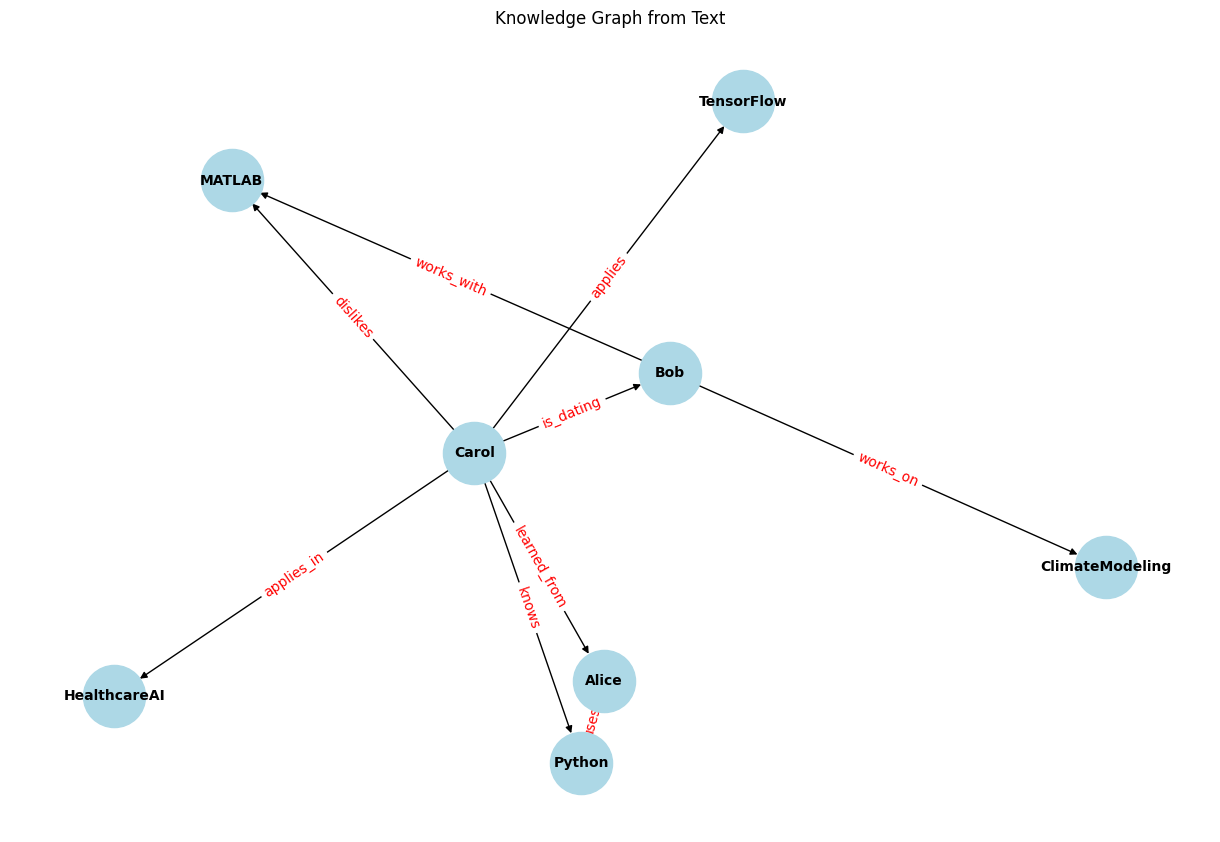

In [105]:
pos = nx.spring_layout(G, seed=0)
edge_labels = nx.get_edge_attributes(G, 'label')

plt.figure(figsize=(12,8))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Knowledge Graph from Text")
plt.show()

In [108]:
centrality = nx.degree_centrality(G)


max_node = max(centrality, key=centrality.get)
print("Most central node:", max_node)
print("Centrality score of Carol:", centrality['Carol'])

Most central node: Carol
Centrality score of Carol: 0.8571428571428571


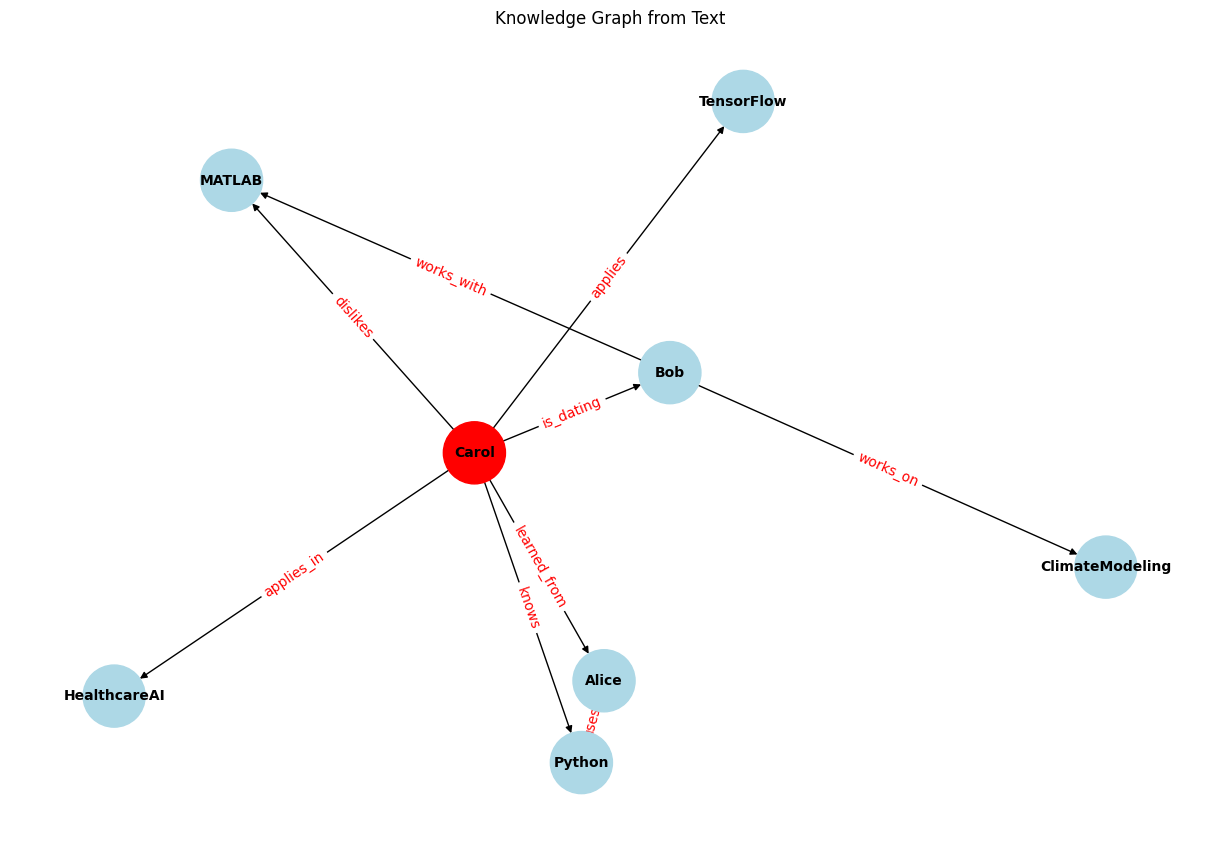

In [107]:
node_colors = ["red" if node == max_node else "lightblue" for node in G.nodes()]

plt.figure(figsize=(12,8))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color=node_colors, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Knowledge Graph from Text")
plt.show()

Questions:
•	Which entity has the highest degree centrality?
•	How could adding more text improve the richness of relationships?
•	Add a new sentence to the text (e.g., 'TensorFlow supports AI Healthcare.').
•	Update triples and regenerate the graph.
•	Highlight the most central node in a different color 
